## Some Scatter Plots

This file contains scatter plots based on the file train_labels_augmented.csv, created in SelectingProminentRatios.ipynb

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

Read the augmented file from the EDA

In [2]:
tl_aug = pd.read_csv("../Data/train_labels_augmented.csv")

Do a data split

In [4]:
from sklearn.model_selection import train_test_split

tl_aug_train, tl_aug_test = train_test_split(tl_aug,shuffle=True,random_state=43)
tl_aug_train

,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,...,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
711,S0711,0,0,0,1,0,1,0,0,0,...,0.237891,0.079019,16.0,509.509,0.085538,0.031036,28.0,418.743,0.024366,0.017974
1,S0001,0,1,0,0,0,0,0,0,0,...,0.033209,0.024006,16.0,497.404,0.093082,0.020585,18.0,-60.370,0.030234,0.019214
416,S0416,0,0,0,0,0,0,0,0,0,...,0.368973,0.228276,17.0,68.887,0.306080,0.151482,32.0,-60.038,0.237317,0.125795
395,S0395,0,0,0,0,0,0,0,0,1,...,0.233822,0.049446,28.0,224.802,0.024865,0.018798,44.0,184.607,0.030780,0.014266
121,S0121,0,0,0,0,0,0,1,0,0,...,0.494166,0.283863,17.0,935.618,0.198131,0.110410,1.0,902.018,0.120519,0.082655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,S0016,1,1,0,1,0,1,1,1,1,...,0.248640,0.076741,44.0,739.958,0.080863,0.045461,1.0,186.912,0.042411,0.029838
58,S0058,0,0,1,0,0,0,1,0,0,...,0.094396,0.061597,44.0,656.414,0.091864,0.037955,16.0,699.931,0.027871,0.016826
277,S0277,0,0,0,0,0,0,0,0,1,...,0.258112,0.107848,64.0,985.582,0.207979,0.059369,48.0,988.637,0.154825,0.043878
255,S0255,0,0,0,0,0,0,0,1,0,...,0.066357,0.029688,32.0,120.792,0.036176,0.027554,16.0,418.416,0.014662,0.008998


Separate the list of ions

In [11]:
ions = list(tl_aug.columns)[1:11]
ions

['basalt',
 'carbonate',
 'chloride',
 'iron_oxide',
 'oxalate',
 'oxychlorine',
 'phyllosilicate',
 'silicate',
 'sulfate',
 'sulfide']

For the most prominent ratio we create scatter plots of the peak abunadnce and temperature at which it occurs, separated by whether each of the ten ions is present or not   

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6184/2548227337.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


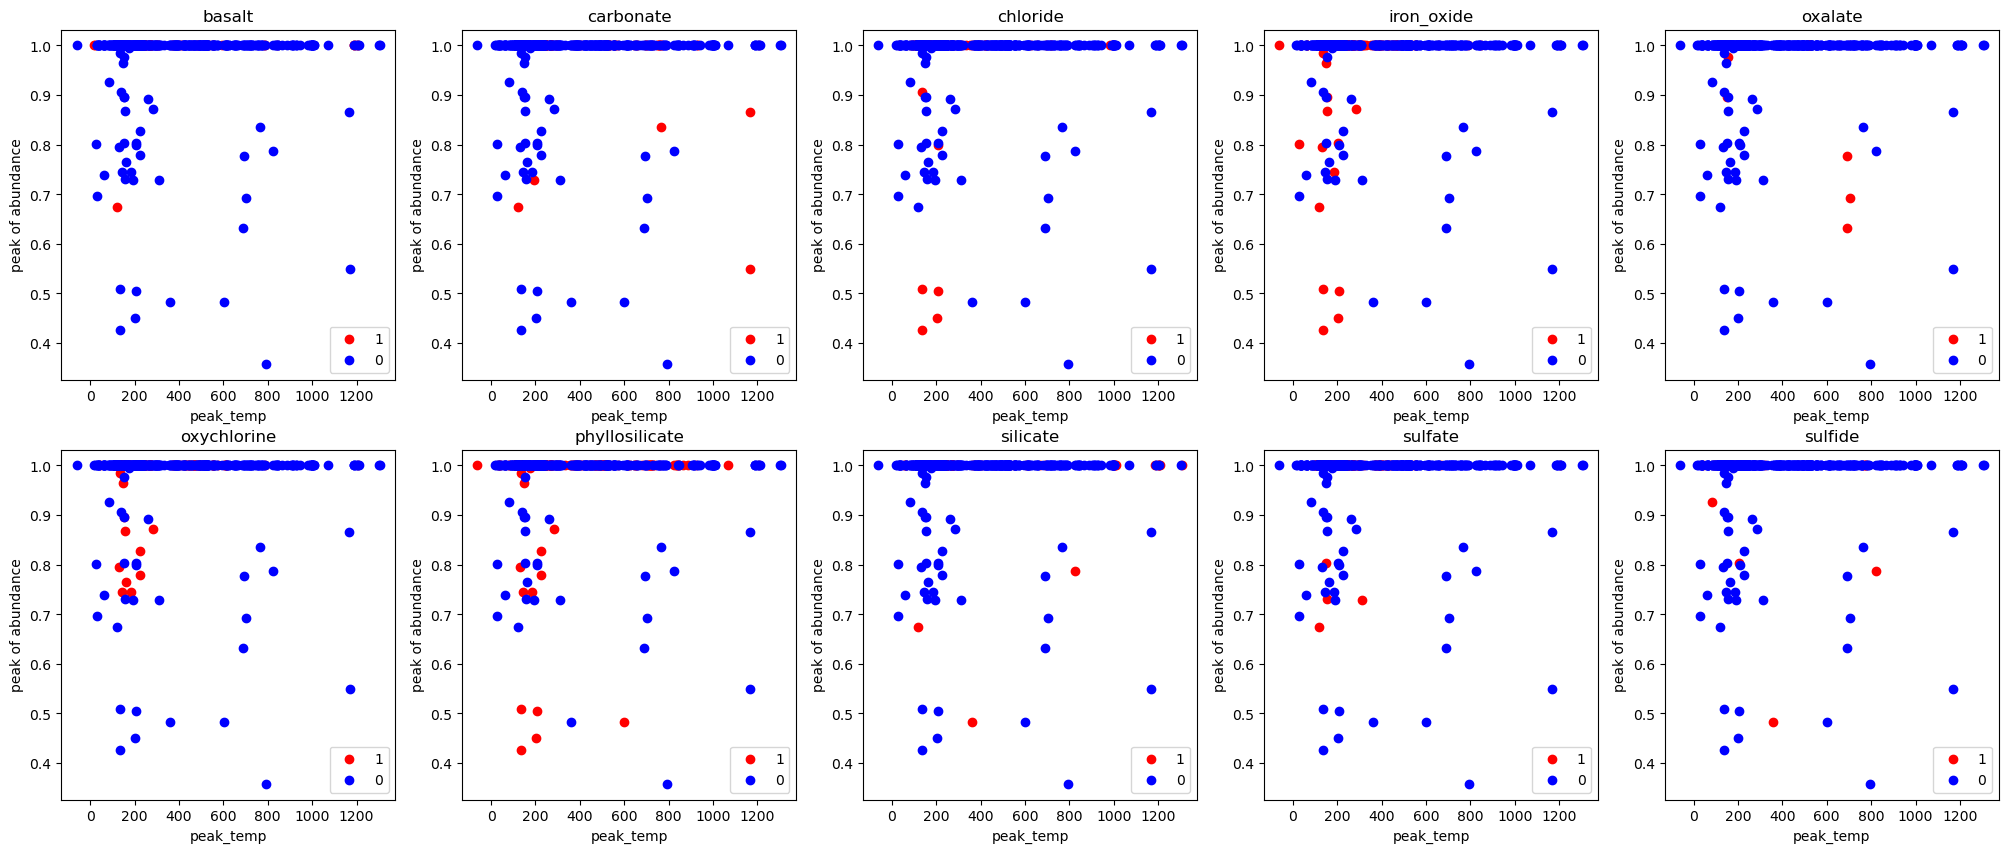

In [ ]:
num_ratio = str(1) # the most prominent ratio

fig, axs = plt.subplots(2,5,figsize=(25,10))

for i, ion in enumerate(ions):
    plt.subplot(2,5,i+1)

    X1 = tl_aug_train[tl_aug_train[ion]==1]
    X0 = tl_aug_train[tl_aug_train[ion]==0]
    plt.scatter(X1[num_ratio+'_ratio_peak_temp'],X1[num_ratio+'_ratio_peak_abund'], color = 'r',label = '1') # red if the ion is there

    plt.scatter(X0[num_ratio+'_ratio_peak_temp'],X0[num_ratio+'_ratio_peak_abund'], color = 'b',label = '0')
    plt.title(ion)
    plt.legend()
    plt.xlabel('peak_temp')
    plt.ylabel('peak of abundance')

fig.tight_layout

fig.show()

No obvious separation. Now try to plot mean+std of the abunance against peak temperature

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6184/2390124674.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


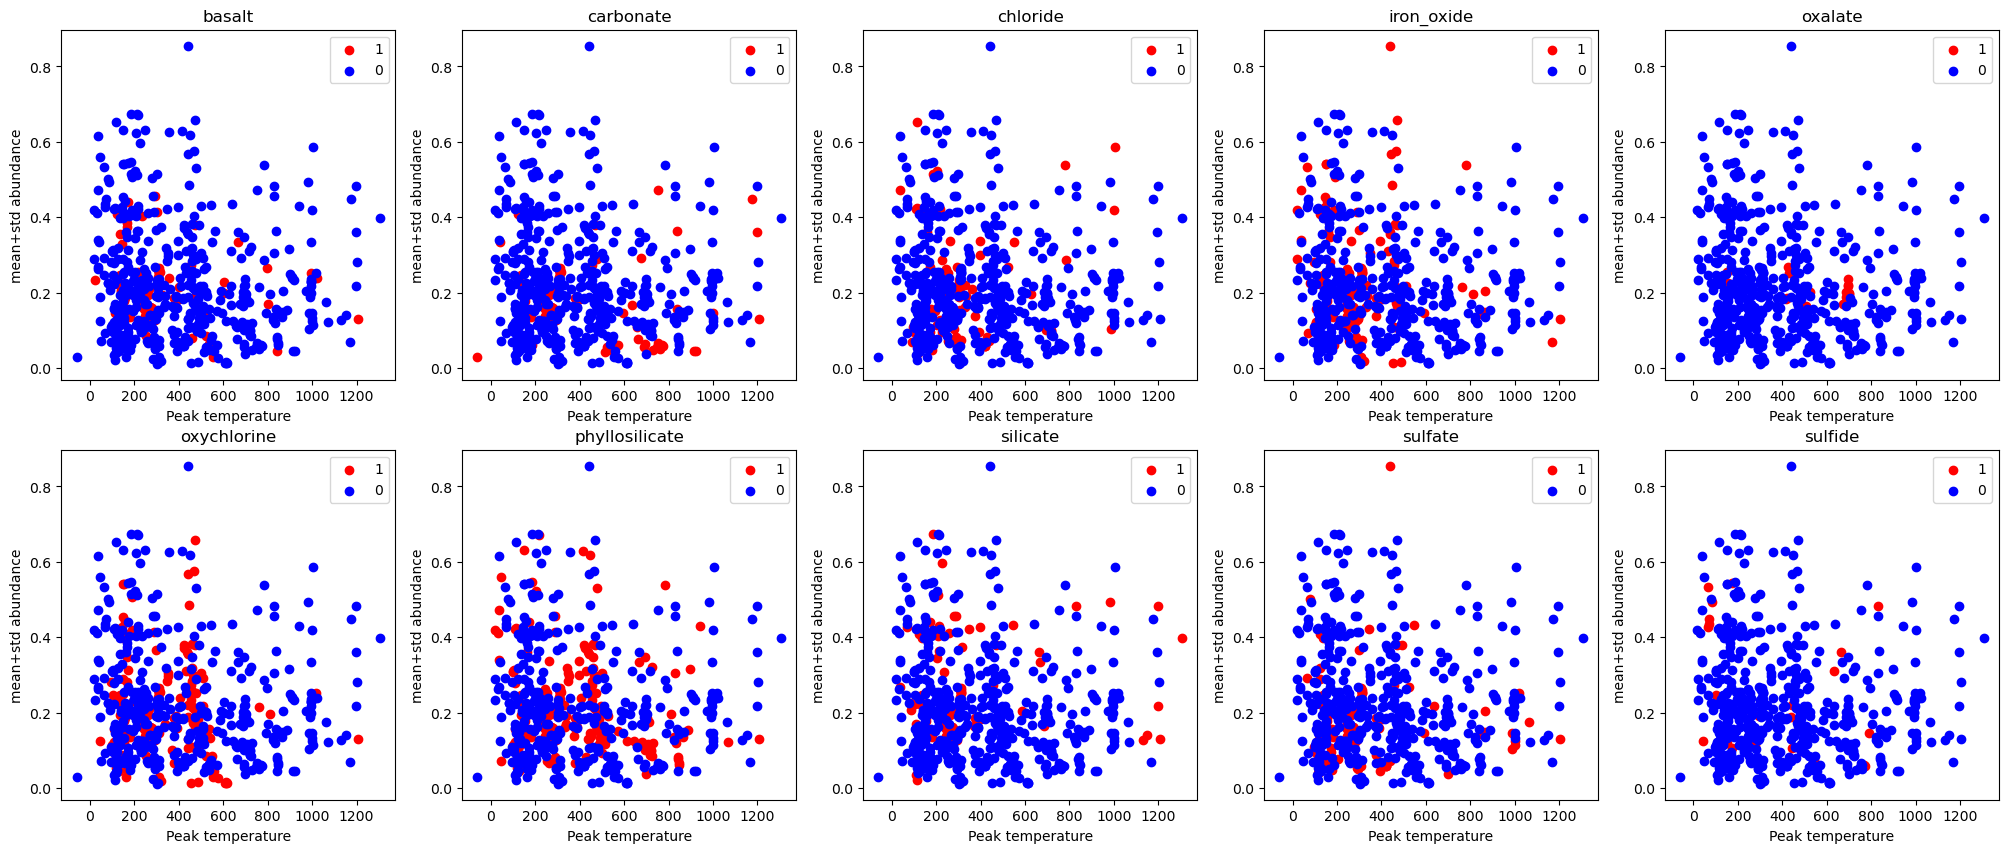

In [ ]:
num_ratio = str(2) # decide which ratio to try

fig, axs = plt.subplots(2,5,figsize=(25,10))

for i, ion in enumerate(ions):
    plt.subplot(2,5,i+1)

    X1 = tl_aug_train[tl_aug_train[ion]==1]
    X0 = tl_aug_train[tl_aug_train[ion]==0]
    plt.scatter(X1[num_ratio+'_ratio_peak_temp'],X1[num_ratio+'_ratio_meanstd_abund'], color = 'r',label = '1')

    plt.scatter(X0[num_ratio+'_ratio_peak_temp'],X0[num_ratio+'_ratio_meanstd_abund'], color = 'b',label = '0')
    plt.title(ion)
    plt.legend()
    plt.xlabel('Peak temperature')
    plt.ylabel('mean+std abundance')
    
fig.tight_layout

fig.show()

We now try to separate by value of the num_ratio-th most prominent ratio

In [14]:
num_ratio = str(1) # look at the most abundant ratio

list(set(tl_aug_train[num_ratio+'_ratio'].values)) # this puts into a list the possible values for the most prominent mass to charge ratio

# for each of those values of m/z, make a dictionary that stores in how many samples it appears

RatioFrequency = {}

for i in list(set(tl_aug_train[num_ratio+'_ratio'].values)):
    RatioFrequency[(i)] = list(tl_aug_train[num_ratio+'_ratio'].values).count(i)

print(RatioFrequency)

{32.0: 67, 1.0: 2, 2.0: 6, 44.0: 36, 18.0: 418, 28.0: 35, 30.0: 1}


For each of the five most prominent mass to charge values we create ten scatter plots of the peak abundance against the temperature when it occurs, separated in color by presence of each ion


/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_23262/2169873821.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


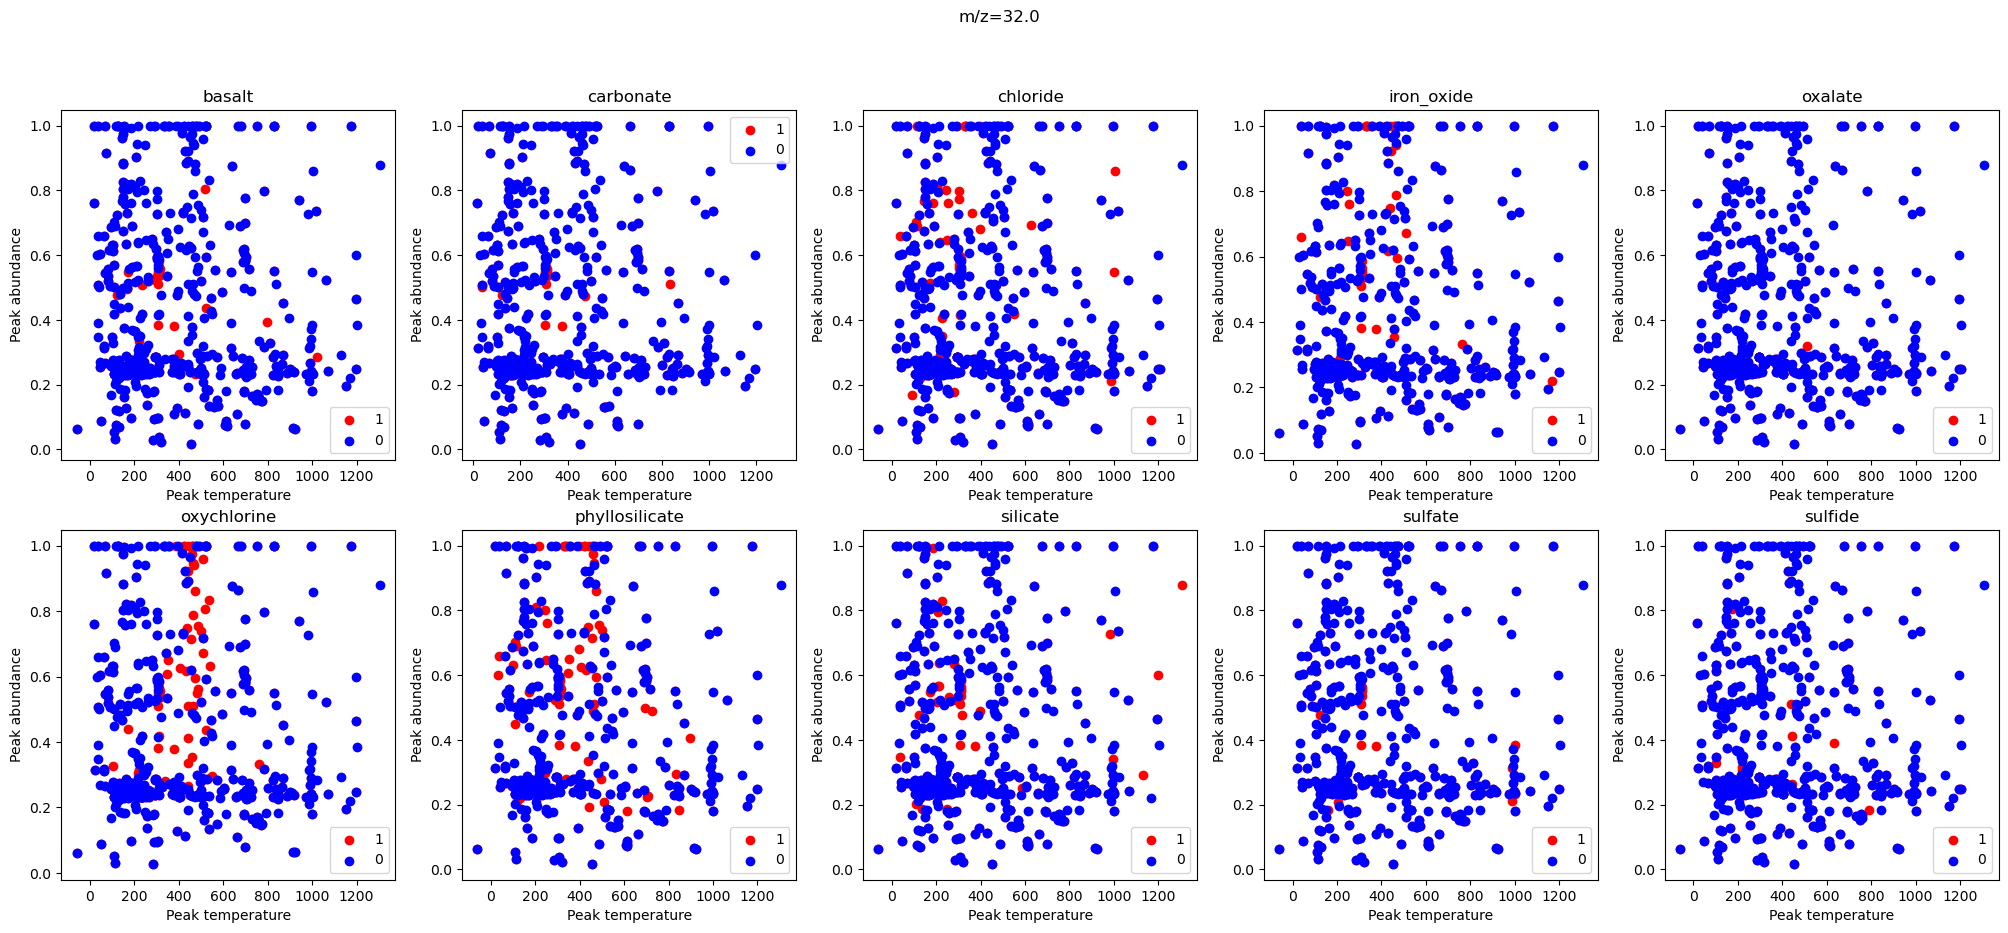

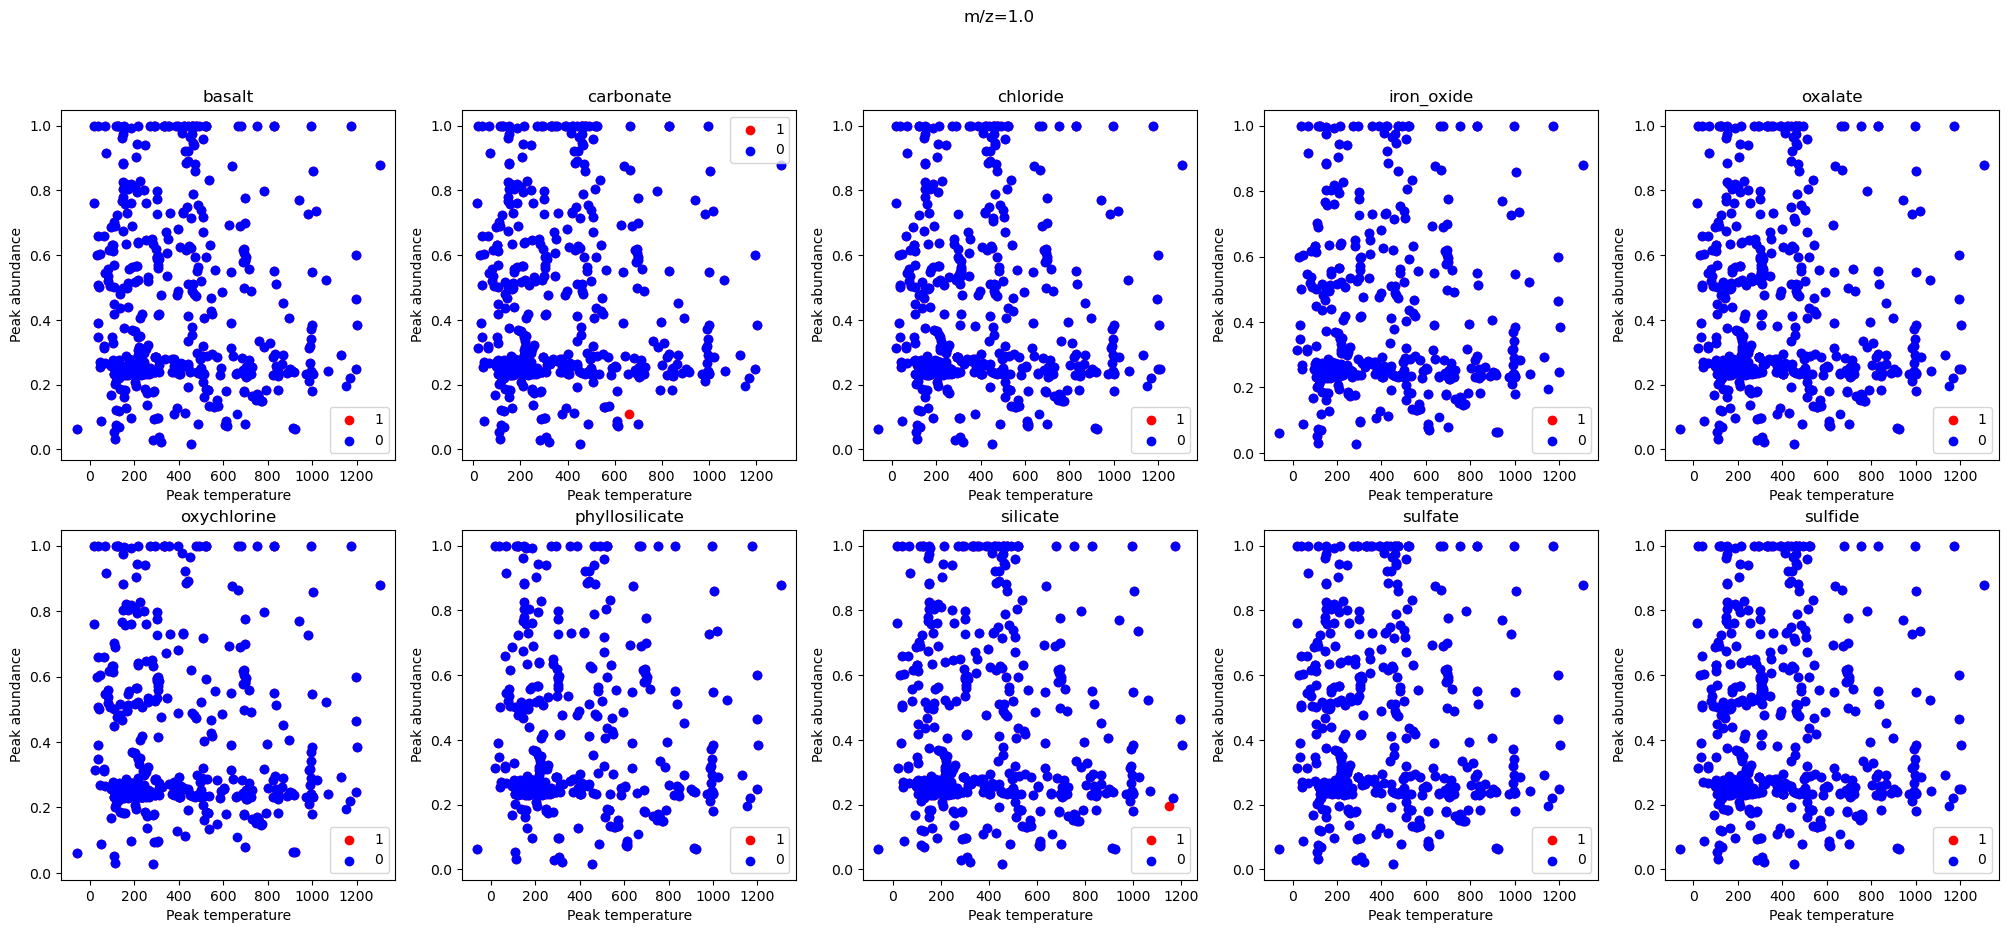

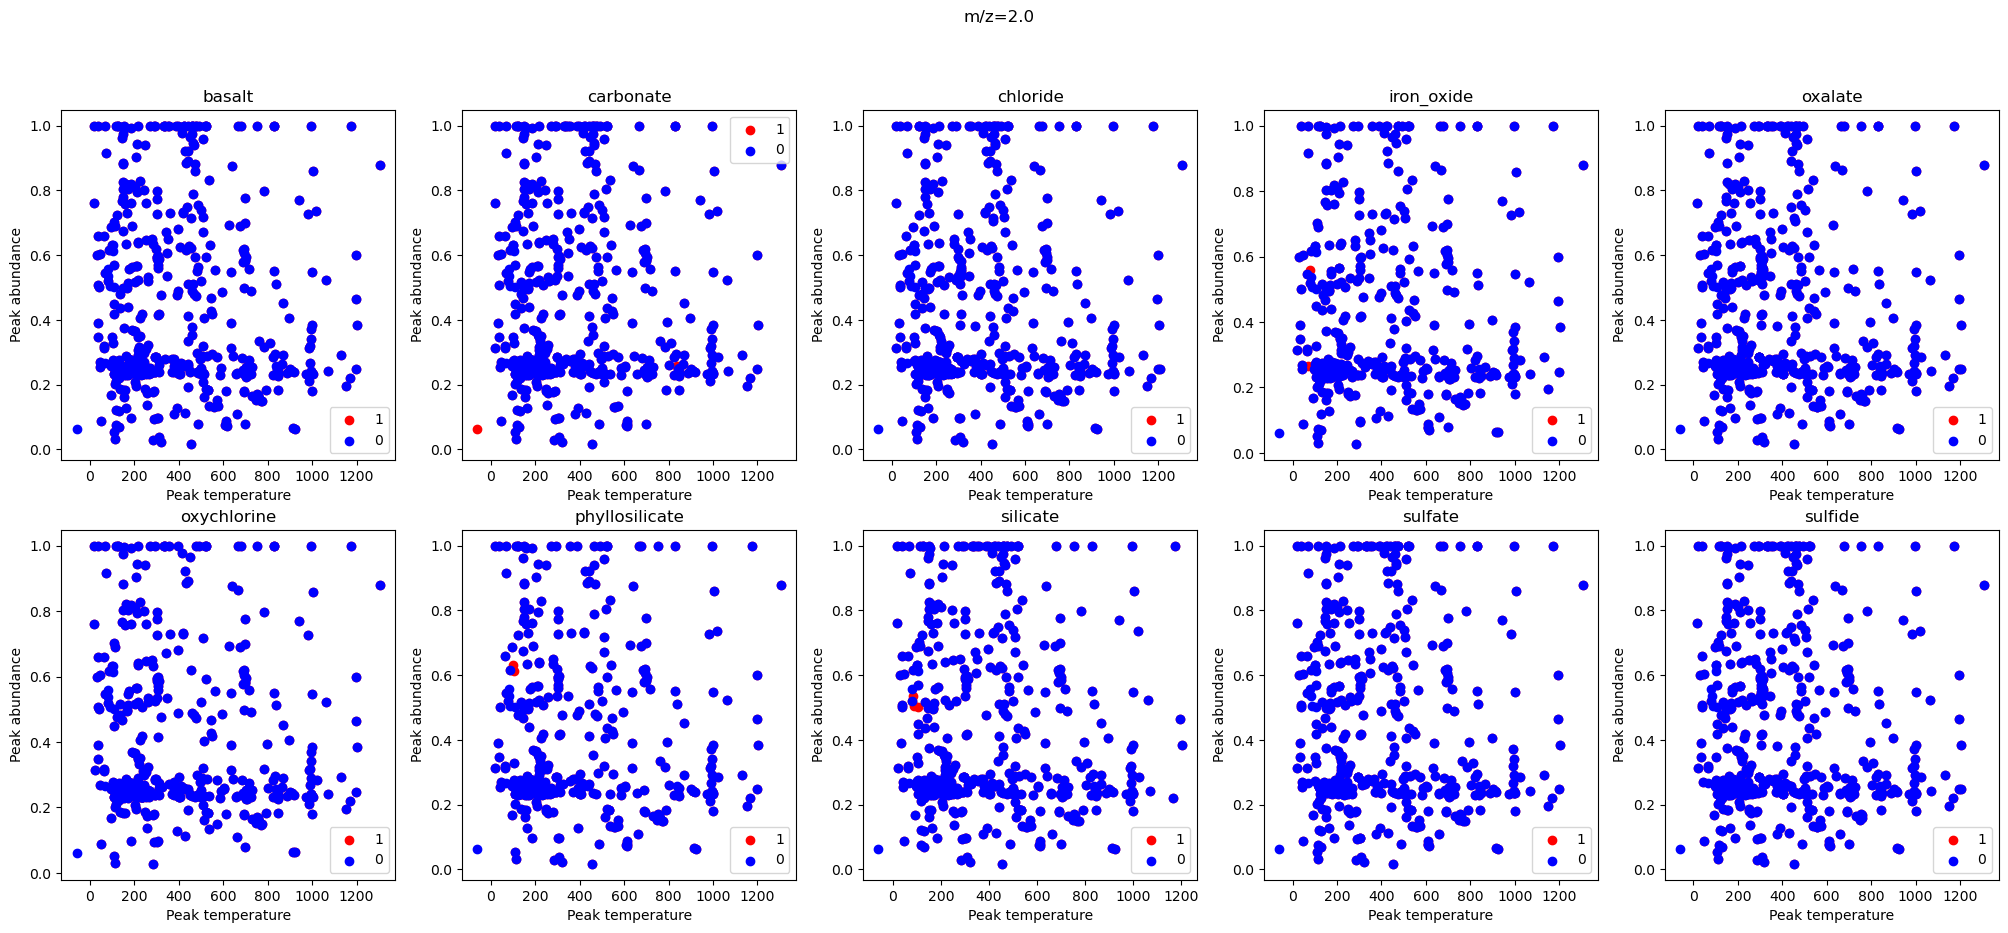

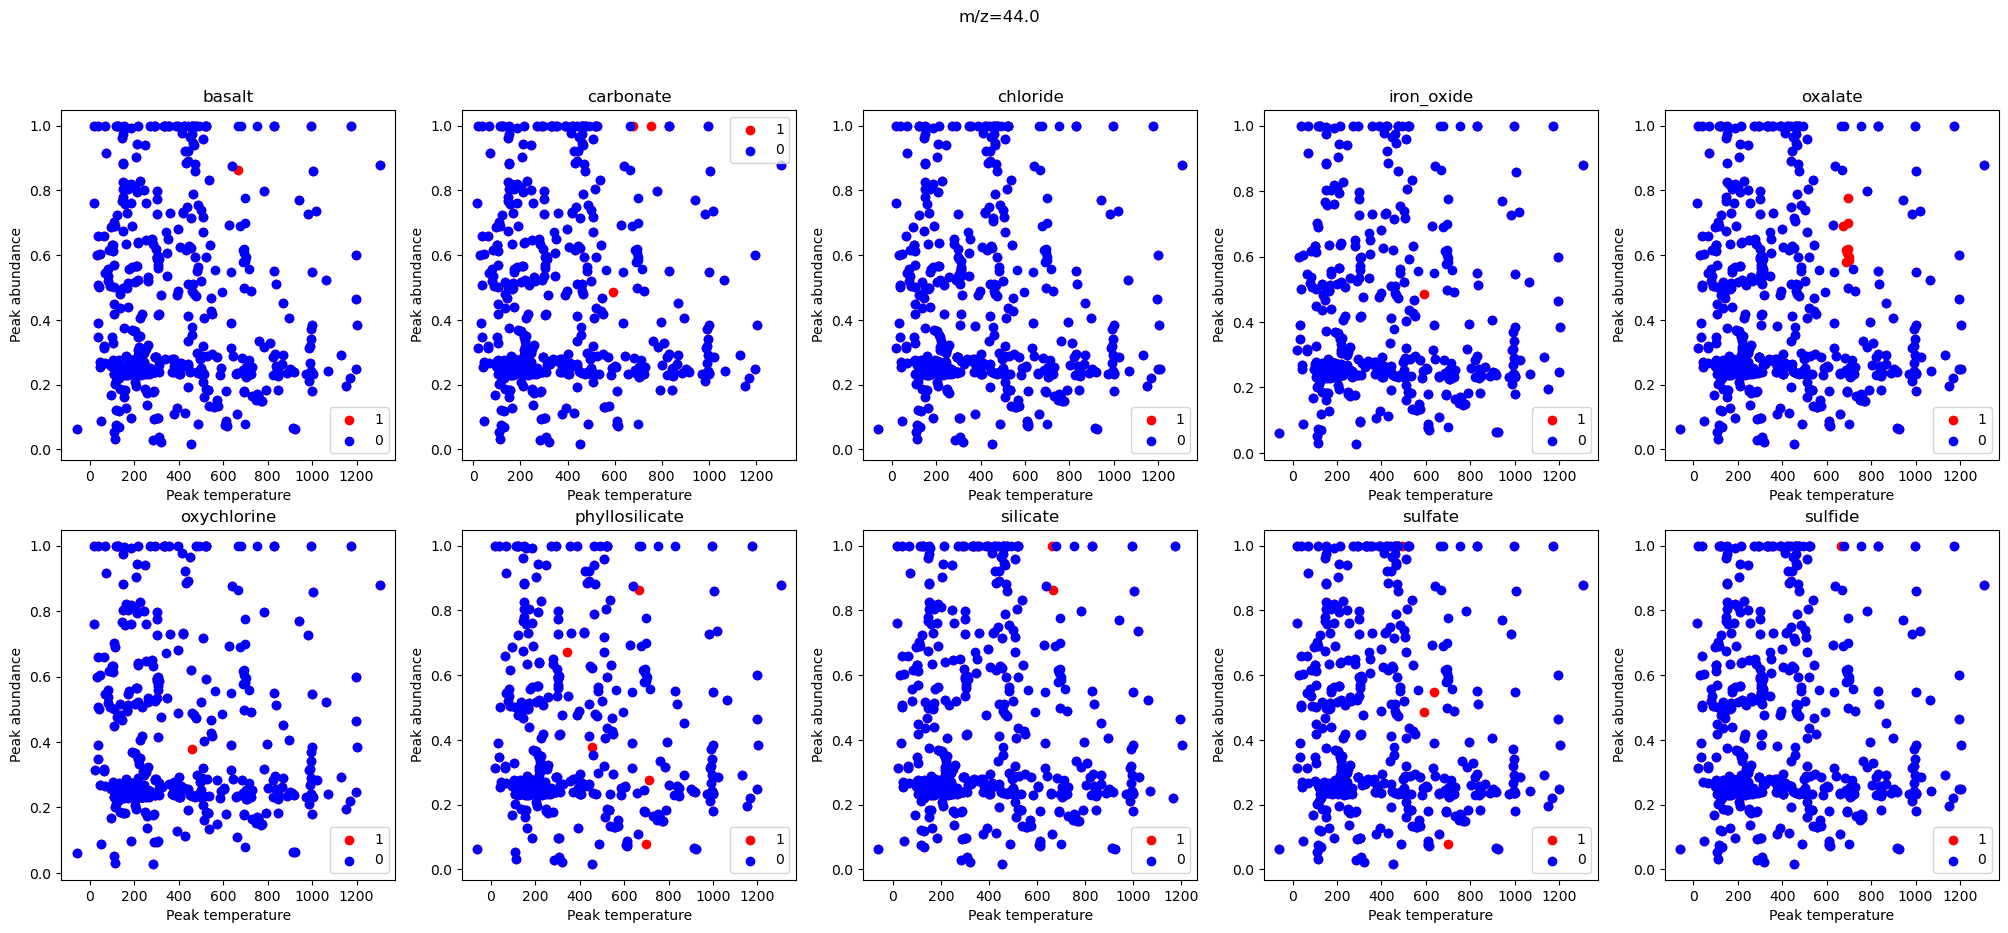

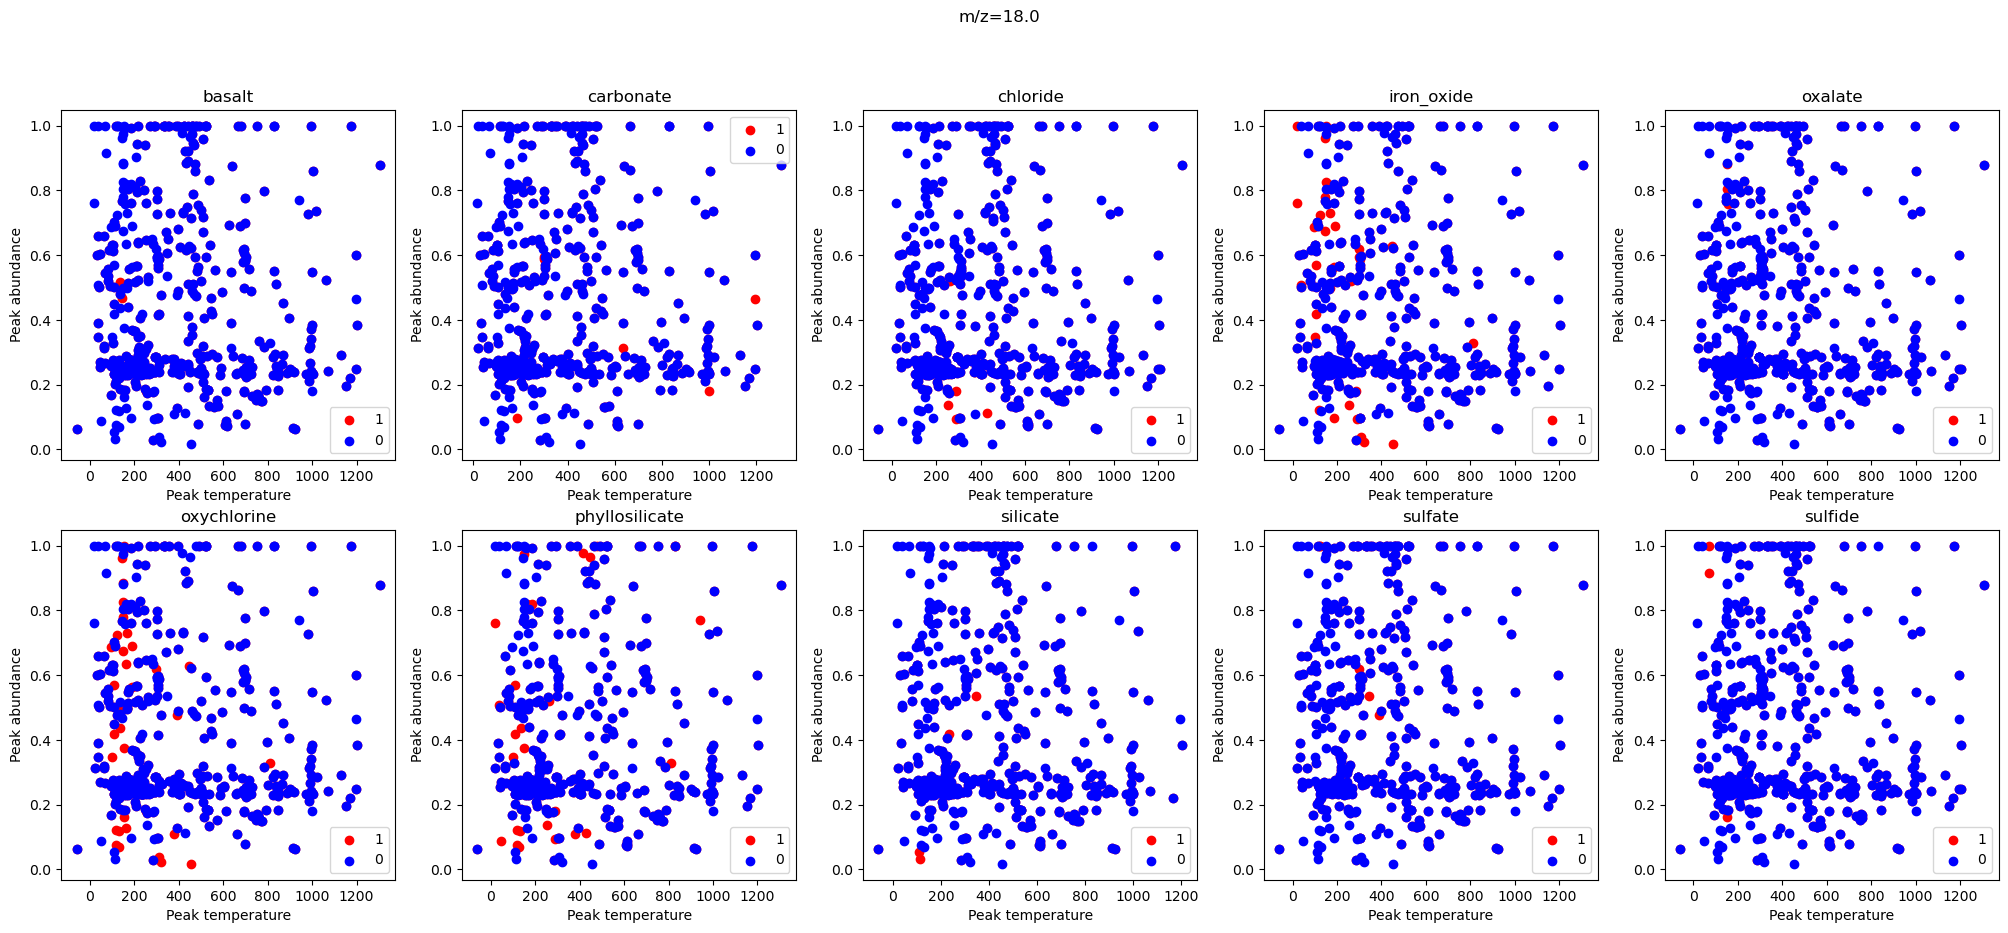

In [20]:


for j in list(RatioFrequency.keys())[:5]: # for each value of m/z among the relevant ones


    fig, axs = plt.subplots(2,5,figsize=(25,10))

    for i, ion in enumerate(ions):
        plt.subplot(2,5,i+1)

        X1 = tl_aug_train[tl_aug_train[ion]==1 & (tl_aug_train['2_ratio']==j)]
        X0 = tl_aug_train[tl_aug_train[ion]==0 & (tl_aug_train['2_ratio']==j)]
        plt.scatter(X1[num_ratio+'_ratio_peak_temp'],X1[num_ratio+'_ratio_peak_abund'], color = 'r',label = '1')

        plt.scatter(X0[num_ratio+'_ratio_peak_temp'],X0[num_ratio+'_ratio_peak_abund'], color = 'b',label = '0')
        plt.title(ion)
        plt.legend()
        plt.xlabel('Peak temperature')
        plt.ylabel('Peak abundance')

    fig.tight_layout

    fig.suptitle("m/z="+str(j))

    fig.show()